In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader


In [4]:

print(torch.cuda.is_available())  # Esto debe devolver True si hay una GPU disponible
print(torch.cuda.device_count())  # Muestra cuántas GPUs están disponibles
print(torch.cuda.current_device())  # Muestra el índice de la GPU que se está usando actualmente
print(torch.cuda.get_device_name(0))  # Muestra el nombre de la GPU


True
1
0
NVIDIA GeForce RTX 4050 Laptop GPU


In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [17]:
train_dir = r'C:\Users\cabal\Desktop\Hacks\AgrIA\Data\Trainning'
train_dir.replace("\\","/")

# Definir las transformaciones para las imágenes
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Cambia el tamaño de las imágenes
    transforms.ToTensor(),  # Convertir a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizar entre [-1, 1]
])


In [18]:

# Cargar el conjunto de entrenamiento
trainset = datasets.ImageFolder(root=train_dir, transform=transform)
trainloader = data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)


In [19]:
# Verificar un lote de entrenamiento
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Mostrar tamaño de los tensores
print(images.shape) 
print(labels.shape)  

torch.Size([1, 3, 150, 150])
torch.Size([1])


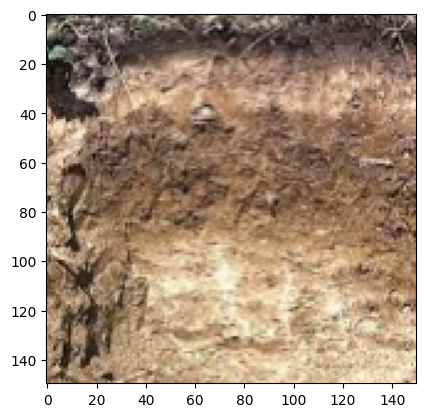

In [20]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# show images
imshow(torchvision.utils.make_grid(images))

In [21]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim

# Definir una red simple
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 34 * 34, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(trainset.classes))  # Número de clases en la última capa

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 34 * 34)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Crear el modelo, criterio y optimizador
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Entrenar el modelo
for epoch in range(20):  # Entrenar por 10 épocas
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 9:    # Imprimir cada 100 minibatches
            print(f'[Epoch {epoch + 1}, Minibatch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Minibatch 10] loss: 0.221
[Epoch 1, Minibatch 20] loss: 0.216
[Epoch 1, Minibatch 30] loss: 0.220
[Epoch 1, Minibatch 40] loss: 0.222
[Epoch 2, Minibatch 10] loss: 0.219
[Epoch 2, Minibatch 20] loss: 0.217
[Epoch 2, Minibatch 30] loss: 0.220
[Epoch 2, Minibatch 40] loss: 0.222
[Epoch 3, Minibatch 10] loss: 0.220
[Epoch 3, Minibatch 20] loss: 0.220
[Epoch 3, Minibatch 30] loss: 0.209
[Epoch 3, Minibatch 40] loss: 0.218
[Epoch 4, Minibatch 10] loss: 0.208
[Epoch 4, Minibatch 20] loss: 0.226
[Epoch 4, Minibatch 30] loss: 0.218
[Epoch 4, Minibatch 40] loss: 0.202
[Epoch 5, Minibatch 10] loss: 0.197
[Epoch 5, Minibatch 20] loss: 0.223
[Epoch 5, Minibatch 30] loss: 0.207
[Epoch 5, Minibatch 40] loss: 0.213
[Epoch 6, Minibatch 10] loss: 0.205
[Epoch 6, Minibatch 20] loss: 0.195
[Epoch 6, Minibatch 30] loss: 0.180
[Epoch 6, Minibatch 40] loss: 0.224
[Epoch 7, Minibatch 10] loss: 0.173
[Epoch 7, Minibatch 20] loss: 0.203
[Epoch 7, Minibatch 30] loss: 0.208
[Epoch 7, Minibatch 40] loss

Clase predicha: cambisol fertil


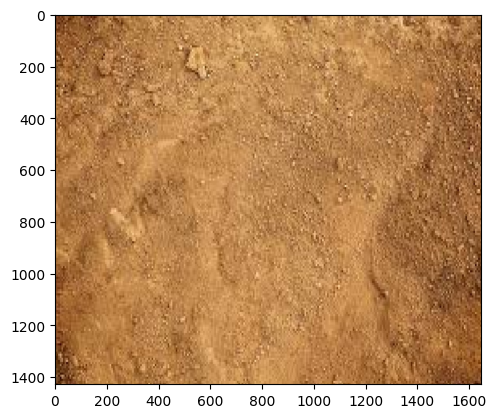

In [44]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar una imagen desde la ruta
image_path = r'C:\Users\cabal\Desktop\Hacks\AgrIA\Data\Test\test\Suelos_Arenosos\6.jpg'  # Cambia por la ruta a tu imagen
image_path.replace("\\","/")
# Transformar la imagen (aplicar los mismos transform usados en el entrenamiento)
image = Image.open(image_path)
image = transform(image).unsqueeze(0)  # Añadir una dimensión extra para el batch

# Colocar el modelo en modo de evaluación
model.eval()

# Desactivar autograd para hacer la predicción
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output, 1)

# Mostrar el resultado
print(f'Clase predicha: {trainset.classes[predicted.item()]}')

# Mostrar la imagen
plt.imshow(Image.open(image_path))
plt.show()
